In [229]:
#@title Librerias

import numpy as np # Númerica
from numpy.polynomial.polynomial import Polynomial
import matplotlib.pyplot as plt # Gráficas
from scipy.integrate import quad, trapezoid, simpson, tplquad, fixed_quad # Integracón
from scipy.interpolate import CubicSpline, CubicHermiteSpline, interp1d, lagrange # Interpolación
from scipy.optimize import fsolve, root_scalar, newton # Raíces
from scipy.stats import linregress # Regresión
import sympy as sp # Simbólica

# Parcial I - Métodos Computacionales
**2024-2**

---

*Nombre:*

*Identificación:*

---
* Sea honest@
* El uso de herramientas de IA no está permitido
* Puede consultar la documentación de las librerias.
* Sea ordendado dando la solución a cada punto.
* *Asegurese que el notebook corra completamente*
* Suba su notebook al GitHub del curso y recuerde hacer pull-request

# 1

**(40 puntos)** La velocidad del agua $v$ [m/s] en la descarga de un tanque cilindrico a través de un tubo largo (como se muestra en la figura) se puede calcular como:

$$
v = \sqrt{2gH}\tanh{\left(\frac{\sqrt{2gH}}{2L}t\right)}
$$



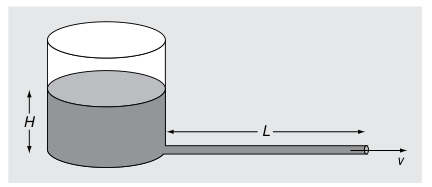

donde $g$ = 9.81 m/s$^2$, H es la carga hidrostática inicial (m), L la longitud del tubo (m) y $t$ el tiempo transcurrido (s).

*a)* Escriba una función explicita para encontrar la velocidad de descarga en función de las variables asociadas.

*b)* Realice un gráfico de $v(H)$ para $0\leq H\leq 5$, con $L = 4$ m y para $t = 2.5$ s

*c)* Suponga que quiere conocer la carga hidrostática necesaria para tener una velocidad de 5 m/s transcurridos 2.5 s. Identifique gráficamente este valor.

*d)* Realice una función que encuentre la raiz usando el método de bisección con una tolerancia de 1e-7, para esto puede modificar el siguiente pseudo-código:


```python
MÉTODO BISECCIÓN(f, a, b, tol)
    MIENTRAS (b - a)/2 > tol HACER
        c = (a + b)/2
        
        SI f(c) = 0 ENTONCES
            RETORNAR c
        
        SI f(a)*f(c) < 0 ENTONCES
            b = c
        SINO
            a = c
        FIN SI
    FIN MIENTRAS
    
    RETORNAR (a + b)/2
FIN MÉTODO
```

*e)* Usando el método de `scipy.newton` encuentre el valor de la raiz

```python
# Método de Newton
root = newton(f, x0, fprime)  # fprime es la derivada
```

Compare sus respuestas con el numeral anterior y obtenga el error relativo.


In [230]:
# a) Definición de función
def velocidad_agua(H, L, t):

  """
  Cálculo de la velocidad de descarga de un tanque cilíndrico.

  Args:
    :H: carga hidrostática [m]
    :L: longitud del tubo [m]
    :t: tiempo transcurrido [s]

  Returns:
    :v: velocidad de descarga [m/s]
  """

  # Constantes
  g = 9.81  # [m * s ** -2]

  return np.sqrt(2 * g * H) * np.tanh((np.sqrt(2 * g * H) / (2 * L)) * t)



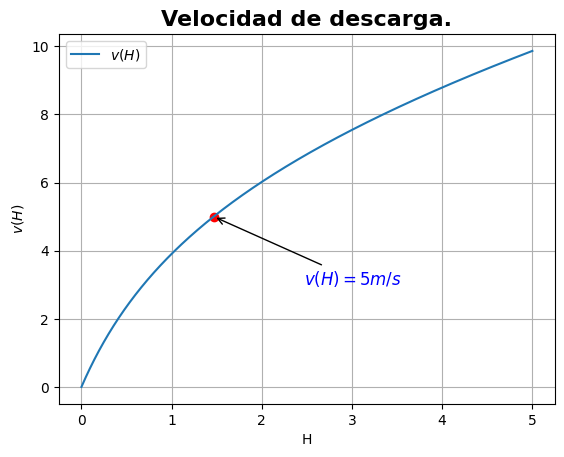

In [231]:
# b) Gráfico de v(H)

H = np.linspace(0, 5, 100000)

# Valores de la función
v_H = velocidad_agua(H, 4, 2.5)

plt.title('Velocidad de descarga.', fontsize=16, fontweight='bold')
plt.plot(H, v_H, label=r'$v(H)$')

# c) Raíz intuitiva
index_v_H = np.where(np.isclose(v_H, 5, atol=1e-5))  # Índices donde v_H es muy cercano a 5 [m/s]
# Valores correspondientes de H (raíz buscada)
index_H = H[index_v_H]

# Mostrar el punto buscado
plt.scatter(index_H,velocidad_agua(index_H, 4, 2.5), color='r')
# Anotaciones sobre el punto
punto = [H[index_v_H], velocidad_agua(index_H, 4, 2.5)]
plt.annotate(r'$v(H)=5 m/s$',
             xy=(punto[0], punto[1]), xytext=(punto[0] + 1, 3),
             fontsize=12, color='b', arrowprops=dict(facecolor='black',
                                                     arrowstyle='->')
            )
plt.xlabel('H')
plt.ylabel(r'$v(H)$')
plt.legend()
plt.grid()
plt.show()

In [232]:
# d) Raíz a partir del método de bisección
funcion_velocidad = lambda h: np.sqrt(2 * 9.81 * h) * np.tanh((np.sqrt(2 * 9.81 * h) / (2 * 4)) * 2.5) - 5

def biseccion(f, a:float, b:float, tol=1e-7, max_iter=100) -> tuple:

  """
  Implementación del método de bisección para determinar raíces de funciones
  continuas en un intervalo [a, b].

  Args:
    f: función continua analizada
    a: Límite inferior del intervalo
    b: Límite superior del intervalo
    tol: error en la solución
    max_iter: número máximo de iteraciones para determinar la solución.

  returns:
    Aproximación de la raíz
    Iteraciones realizadas
    Array con errores en cada cálculo de la solución.
  """

  iter = 0  # Contador para el ciclo while
  iteraciones = np.arange(max_iter)  # Cantidad de iteraciones realiazadas
  errores_abs = np.zeros(max_iter)  # Errores absolutos
  c_inicial = b  # Puede ser cualquier valor en el que f esté definida. General-
                 # mente en el intervalo

  while iter < max_iter:
    c = (a + b) / 2
    errores_abs[iter] = abs(c_inicial - c)

    # Verificación inicial para el método
    if f(a) * f(b) >= 0:
      raise ValueError('Sin raíz en el intervalo o hay múltiples raíces.')

    # Iniciación del método de bisección
    if abs(f(c)) < tol:
      return c # errores_abs[:iter], iteraciones[:iter]

    if f(a) * f(c) < 0:
      b = c
    else:
      a = c

    iter += 1

  raise RuntimeError(f'No se halló la raíz después de {max_iter} iteraciones.')


# Mostrar la raíz por el método de bisección
raiz = biseccion(funcion_velocidad, 0, 5)
print(f'La carga hidrostática es {raiz:.3f} [m].')

La carga hidrostática es 1.466 [m].


In [233]:
# e) Raíz por Newton
from scipy.optimize import newton
raiz_n = newton(funcion_velocidad, 1.5) # Newton-Raphson

print(f'La raiz por el método de Newton-Raphson será {raiz_n:.3f} [m]')

La raiz por el método de Newton-Raphson será 1.466 [m]


# 2

**(30 puntos)** Usualmente algunas reacciones quimicas siguen el siguiente modelo:

$$
\frac{dc}{dt} = -kc^n
$$

donde $c$ es la concentración, $t$ el tiempo, $k$ la tasa de la reacción y $n$ su orden. Usando los siguientes datos:



```python
# Datos dados
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([3.52, 2.48, 1.75, 1.23, 0.87, 0.61])
```


*a)* Conociendo que el método de diferencias finitas se puede escribir como:

###  Diferencias finitas hacia adelante:
Aproximación de primer orden:
$$
f'(x_i) \approx \frac{f(x_{i+1}) - f(x_i)}{h}
$$

### Diferencias finitas hacia atrás:
Aproximación de primer orden:
$$
f'(x_i) \approx \frac{f(x_i) - f(x_{i-1})}{h}
$$

### Diferencias finitas centradas:
Aproximación de segundo orden:
$$
f'(x_i) \approx \frac{f(x_{i+1}) - f(x_{i-1})}{2h}
$$

Escribe una función explicita que calcule $dc/dt$ usando el método de diferencias finitas a partir de los valores de $c$ y $t$, luego grafique en función de t. *Ayuda: No es necesario interpolar*

*b)* Compare el resultado anterior con `numpy.gradient`, se acercan?

*c)* Linealice la ecuación inicial (para esto puede usar log) y encuentre los valores correspondientes a $k$ y $n$



```python
# Realizar el ajuste lineal
slope, intercept, r_value, p_value, std_err = linregress(x, y)
```

*d)* Finalmente, usando los valores de $k$ y $n$ grafique $dc/dt$ y compare con los datos de la tabla. ¿Se comportan igual, determine el error máximo?




In [234]:
# a) Derivada dc/dt por diferencias finitas

t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([3.52, 2.48, 1.75, 1.23, 0.87, 0.61])

def dc_dt(t, c):

  '''
  Aproxima la primera derivada de c en t usando las diferencias finitas.

  Args:
    :t: valores del dominio
    :c: valores de la función en t

  return:
    primera derivada dc/dt en cada valor de t.
  '''

  n = len(t)
  vals_derivada = np.zeros(n)
  for i in range(n):
    if i == 0:
      vals_derivada[i] = (c[i + 1] - c[i]) / (t[i + 1] - t[i])
    elif i == (n - 1):
      vals_derivada[i] = (c[i] - c[i - 1]) / (t[i] - t[i - 1])
    else:
      vals_derivada[i] = (c[i + 1] - c[i - 1]) / (t[i + 1] - t[i - 1])  # Discretización 2h

  return vals_derivada



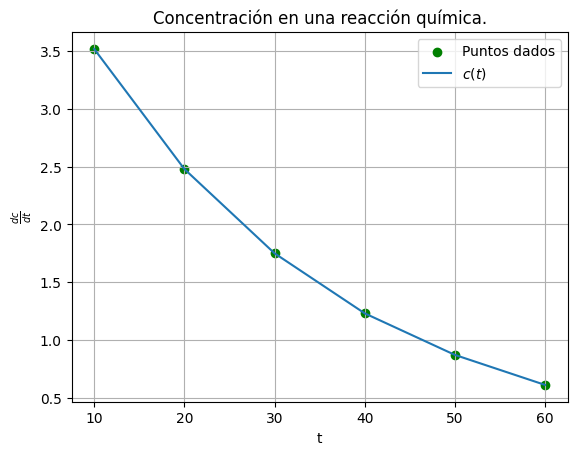

In [235]:
# Gráfica de a)

plt.title('Concentración en una reacción química.')
plt.scatter(t, c, color='g', label='Puntos dados')
plt.plot(t, c, label=r'$c(t)$')
# plt.axhline(0, color='black', linestyle='--')
plt.xlabel('t')
plt.ylabel(r'$\frac{dc}{dt}$')
plt.legend()
plt.grid()
plt.show()

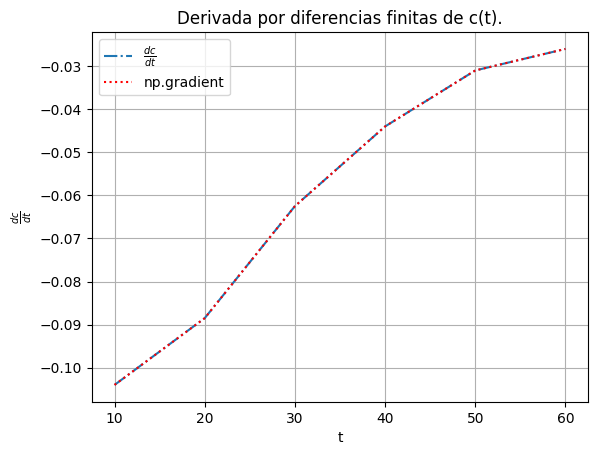

In [236]:
# Derivad por diferencias finitas
dc_dt_finitas = dc_dt(t,c)
plt.title('Derivada por diferencias finitas de c(t).')
plt.plot(t, dc_dt_finitas, '-.', label=r'$\frac{dc}{dt}$')
# b) Comparar con numpy.gradient
h = 10  # Espaciado entre valores consecutivos de t
deriv_grand = np.gradient(c, h)
plt.plot(t, deriv_grand, color='r', linestyle=':', label='np.gradient')
plt.xlabel('t')
plt.ylabel(r'$\frac{dc}{dt}$')
plt.legend()
plt.grid()
plt.show()

Los métodos numéricos para encontrar la derivada de la función parecen arrojar los mismos valores para $\frac{dc}{dt}$, pues sus gráficas se superponen.

Orden de reacción n: 0.8506
Constante de velocidad k: 3.7729e-02
Coeficiente de correlación (R²): 0.9877


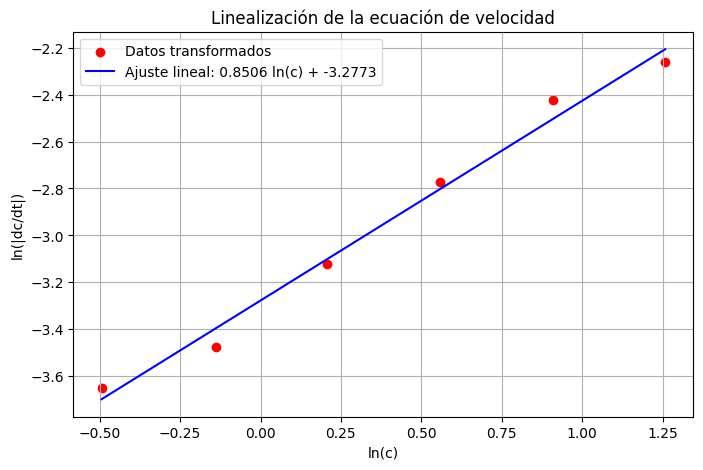

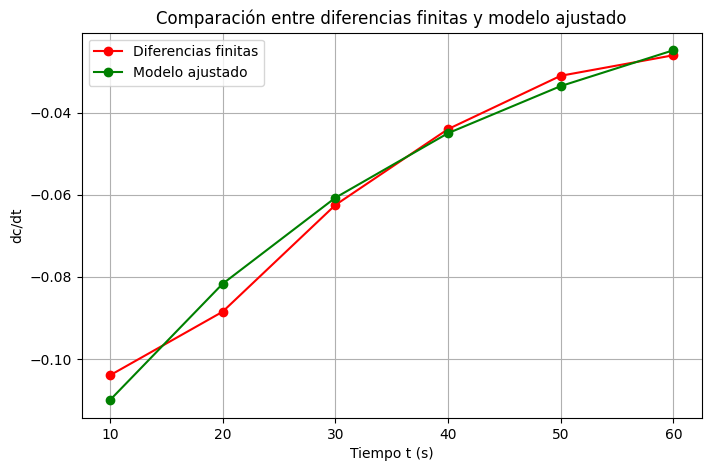

Error máximo entre diferencias finitas y modelo ajustado: 6.8023e-03


In [237]:
# c) Linealización y cálculo de k y n
validos = dc_dt_finitas < 0  # Filtramos solo valores negativos
ln_dc_dt = np.log(np.abs(dc_dt_finitas[validos]))
ln_c = np.log(c[validos])

# Ajuste lineal ln(dc/dt) = ln(k) + n ln(c)
slope, intercept, r_value, p_value, std_err = linregress(ln_c, ln_dc_dt)

# Constante de velocidad k
n = slope  # Pendiente es el orden de reacción n
k = np.exp(intercept)  # Intercepto es ln(k), así que k = e^intercept

print(f"Orden de reacción n: {n:.4f}")
print(f"Constante de velocidad k: {k:.4e}")
print(f"Coeficiente de correlación (R²): {r_value**2:.4f}")

# Graficamos el ajuste lineal
plt.figure(figsize=(8,5))
plt.scatter(ln_c, ln_dc_dt, label="Datos transformados", color='red')
plt.plot(ln_c, slope * ln_c + intercept, label=f"Ajuste lineal: {slope:.4f} ln(c) + {intercept:.4f}", color='blue')
plt.xlabel("ln(c)")
plt.ylabel("ln(|dc/dt|)")
plt.title("Linealización de la ecuación de velocidad")
plt.legend()
plt.grid()
plt.show()

# d) Comparación con modelo ajustado
dc_dt_modelo = -k * c**n  # Modelo teórico con los valores ajustados de k y n

# Comparación gráfica
plt.figure(figsize=(8,5))
plt.plot(t, dc_dt_finitas, 'ro-', label="Diferencias finitas")
plt.plot(t, dc_dt_modelo, 'go-', label="Modelo ajustado")
plt.xlabel("Tiempo t (s)")
plt.title("Comparación entre diferencias finitas y modelo ajustado")
plt.ylabel("dc/dt")
plt.grid()
plt.legend()
plt.show()

# Cálculo del error máximo
error_max_modelo = np.max(np.abs(dc_dt_finitas - dc_dt_modelo))
print(f"Error máximo entre diferencias finitas y modelo ajustado: {error_max_modelo:.4e}")


# 3
**(30 puntos)** Considere los  datos de concentración del punto anterior

```python
# Datos dados
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([5.29, 6.24, 7.02, 7.68, 8.25, 8.77])
```

*a)* Realice un gráfico de $c(t)$

*b)* Usando la interpolación de `scipy.interpolate.lagrange` y de `scipy.interpolate.CubicHermiteSpline` obtenga el polinomio interpolador de lagrange llamado `poly_lagrange` y de Hermite `poly_Hermite` para los datos datos.

*c)* Conociendo que `scipy.interpolate.lagrange` devuelve un array tipo Polynomial, use la siguiente rutina para encontrar la derivada:

``` python
from numpy.polynomial.polynomial import Polynomial

# Convertir a un objeto Polynomial para facilitar la derivación
poly_coef = Polynomial(poly_lagrange.coef[::-1])  # Convertimos los coeficientes
derivative = poly_coef.deriv()  # Calculamos la derivada
```

Luego, grafique $dc/dt$ en función del tiempo $t$ y compare con la función
$$
\frac{dc}{dt} = -kc^n
$$

con $k = 3$ y $n = -2$

*d)* Realice un gráfico del error absoluto




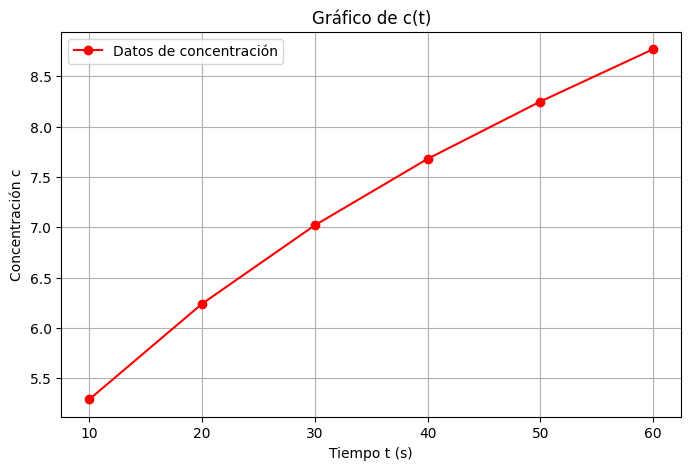

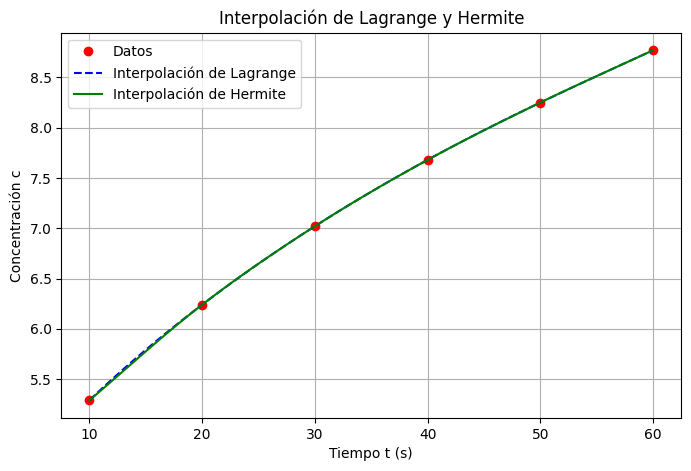

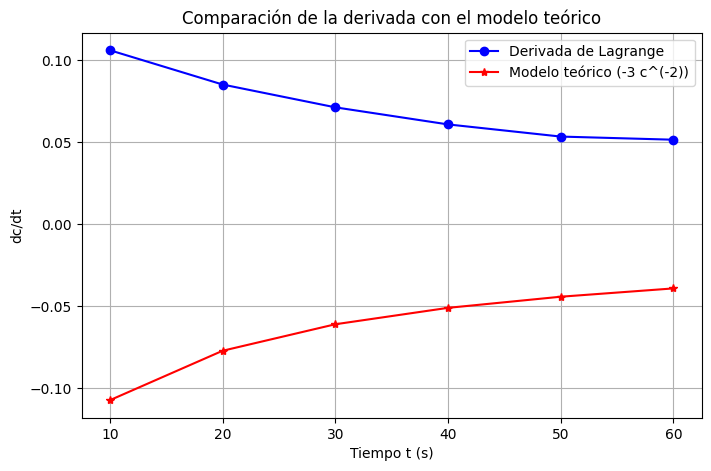

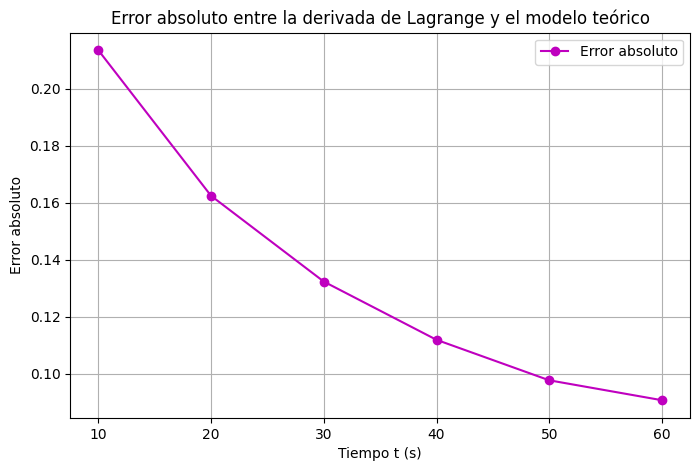

Error máximo: 2.1347e-01


In [238]:
# Datos dados
t = np.array([10, 20, 30, 40, 50, 60])
c = np.array([5.29, 6.24, 7.02, 7.68, 8.25, 8.77])

# a) Gráfico de c(t)
plt.figure(figsize=(8,5))
plt.plot(t, c, 'ro-', label="Datos de concentración")
plt.xlabel("Tiempo t (s)")
plt.ylabel("Concentración c")
plt.title("Gráfico de c(t)")
plt.grid()
plt.legend()
plt.show()

# b) Interpolación con Lagrange y Hermite
# Polinomio interpolador de Lagrange
poly_lagrange = lagrange(t, c)

# Estimación de la derivada numérica (aproximación hacia adelante)
dc_dt_aprox = np.gradient(c, t)

# Polinomio interpolador de Hermite
poly_Hermite = CubicHermiteSpline(t, c, dc_dt_aprox)

# Interpolaciones
t_fine = np.linspace(min(t), max(t), 100)  # Valores más densos para mejor visualización
plt.figure(figsize=(8,5))
plt.plot(t, c, 'ro', label="Datos")
plt.plot(t_fine, poly_lagrange(t_fine), 'b--', label="Interpolación de Lagrange")
plt.plot(t_fine, poly_Hermite(t_fine), 'g-', label="Interpolación de Hermite")
plt.xlabel("Tiempo t (s)")
plt.ylabel("Concentración c")
plt.title("Interpolación de Lagrange y Hermite")
plt.legend()
plt.grid()
plt.show()

# c) Cálculo de la derivada de Lagrange
# Convertir a un objeto Polynomial y calcular la derivada
poly_coef = Polynomial(poly_lagrange.coef[::-1])  # Invertimos coeficientes para numpy.polynomial
derivative_lagrange = poly_coef.deriv()

# Evaluamos la derivada en los puntos t
dc_dt_lagrange = derivative_lagrange(t)

# Función teórica de la derivada: dc/dt = -k c^n con k=3, n=-2
k = 3
n = -2
dc_dt_teorico = -k * c**n

# Graficamos la derivada
plt.figure(figsize=(8,5))
plt.plot(t, dc_dt_lagrange, 'bo-', label="Derivada de Lagrange")
plt.plot(t, dc_dt_teorico, 'r*-', label="Modelo teórico (-3 c^(-2))")
plt.xlabel("Tiempo t (s)")
plt.ylabel("dc/dt")
plt.title("Comparación de la derivada con el modelo teórico")
plt.legend()
plt.grid()
plt.show()

### (d) Cálculo del error absoluto y gráfico
error_abs = np.abs(dc_dt_lagrange - dc_dt_teorico)

plt.figure(figsize=(8,5))
plt.plot(t, error_abs, 'mo-', label="Error absoluto")
plt.xlabel("Tiempo t (s)")
plt.ylabel("Error absoluto")
plt.title("Error absoluto entre la derivada de Lagrange y el modelo teórico")
plt.legend()
plt.grid()
plt.show()

# Imprimir el error máximo
error_maximo = np.max(error_abs)
print(f"Error máximo: {error_maximo:.4e}")
